In [1]:
from sklearn import datasets
import pandas as pd

# โหลดชุดข้อมูล
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  # สร้าง DataFrame

print(iris_df.head())  # แสดง 5 แถวแรก


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
print(iris_df.info())  # ดูประเภทของข้อมูลและค่าที่หายไป
print(iris_df.describe())  # ดูค่าสถิติเบื้องต้น


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

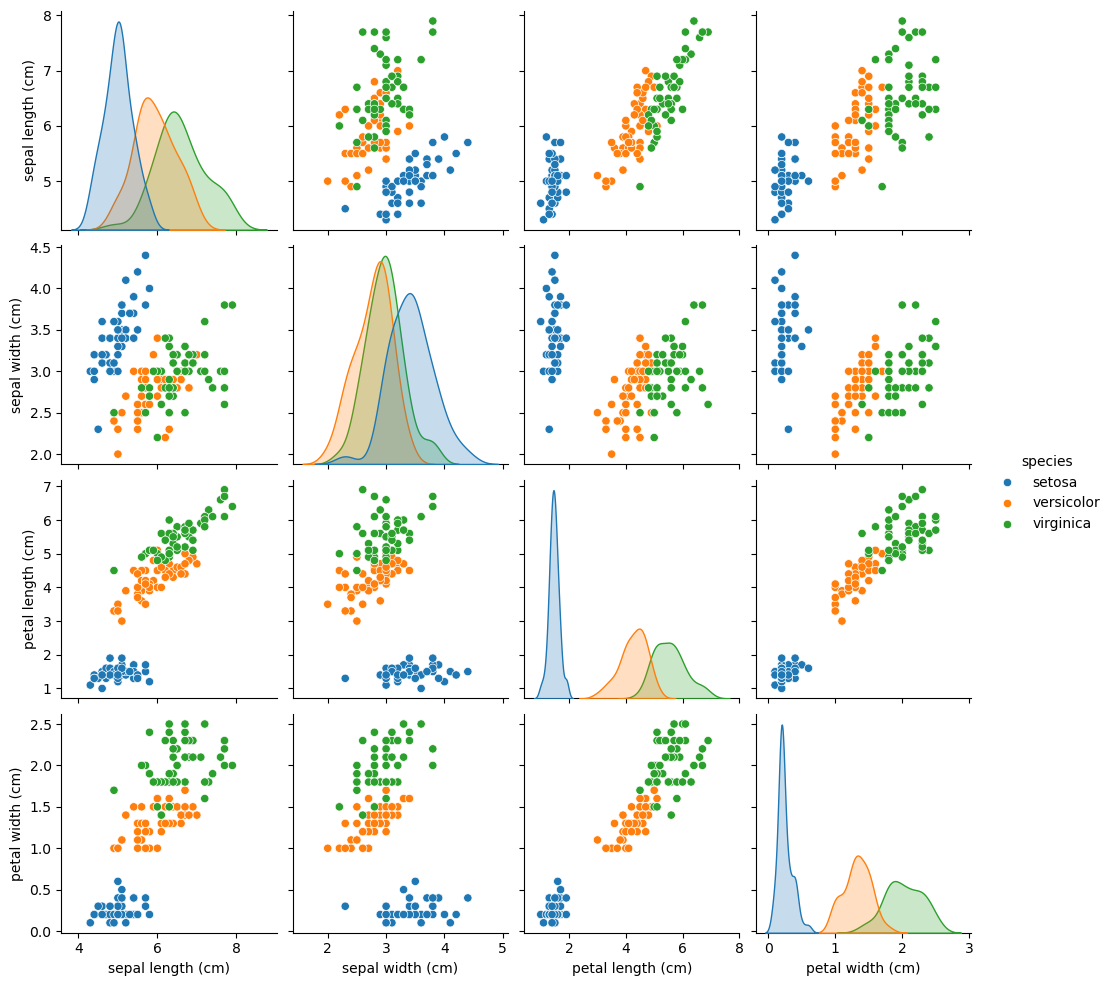

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

# โหลดชุดข้อมูลจาก sklearn
iris = datasets.load_iris()

# แปลงเป็น DataFrame และเพิ่มคอลัมน์ species
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target  # เพิ่มคอลัมน์ species เป็นตัวเลข

# แปลง species จากตัวเลขเป็นชื่อดอกไม้
iris_df["species"] = iris_df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# สร้าง pairplot โดยใช้ KDE บนเส้นทแยงมุม
sns.pairplot(iris_df, hue="species", diag_kind="kde")
plt.show()


In [7]:
iris_df.to_csv("iris_dataset.csv", index=False)
print("บันทึกชุดข้อมูล Iris เป็นไฟล์ iris_dataset.csv สำเร็จ")



บันทึกชุดข้อมูล Iris เป็นไฟล์ iris_dataset.csv สำเร็จ


In [13]:
!pip install yfinance


In [17]:
import yfinance as yf


In [11]:
nvidia = yf.Ticker("NVDA")
nvidia_df = nvidia.history(period="1y")  # ดึงข้อมูลย้อนหลัง 1 ปี

print(nvidia_df.head())  # แสดงตัวอย่างข้อมูล 5 แถวแรก



                                Open       High        Low      Close  \
Date                                                                    
2024-02-01 00:00:00-05:00  62.082397  63.173091  61.632528  63.009136   
2024-02-02 00:00:00-05:00  63.955866  66.581121  63.671946  66.141251   
2024-02-05 00:00:00-05:00  68.205666  69.477309  67.185959  69.312355   
2024-02-06 00:00:00-05:00  69.610266  69.734231  66.281215  68.203667   
2024-02-07 00:00:00-05:00  68.299630  70.200092  67.580832  70.079124   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-02-01 00:00:00-05:00  369146000        0.0           0.0  
2024-02-02 00:00:00-05:00  476578000        0.0           0.0  
2024-02-05 00:00:00-05:00  680078000        0.0           0.0  
2024-02-06 00:00:00-05:00  683111000        0.0           0.0  
2024-02-07 00:00:00-05:00  495575000        0.0           0.0  


In [21]:
print(nvidia_df.info())  # ดูประเภทของข้อมูล
print(nvidia_df.describe())  # ดูค่าสถิติเบื้องต้น


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-02-01 00:00:00-05:00 to 2025-01-31 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.7 KB
None
             Open        High         Low       Close        Volume  \
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02   
mean   114.515205  116.594906  111.979033  114.347951  3.638848e+08   
std     23.202621   23.354114   22.761943   23.019509  1.642342e+08   
min     62.082397   63.173091   61.632528   63.009136  1.051570e+08   
25%     90.482095   92.200683   89.136910   90.73

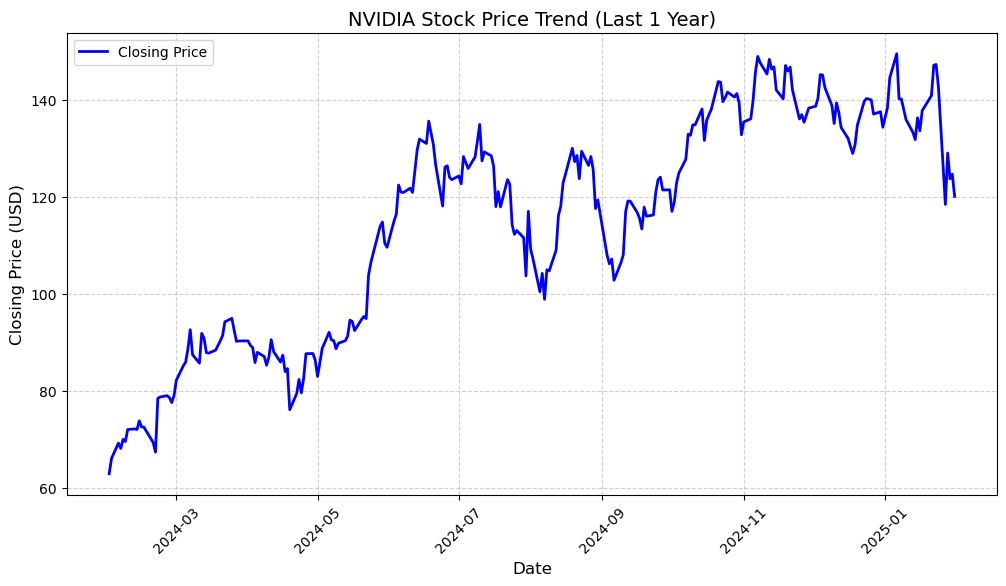

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt

# ✅ Fetch NVIDIA stock data
nvidia = yf.Ticker("NVDA")
nvidia_df = nvidia.history(period="1y")  # Get 1 year of historical data

# ✅ Check if data is available
if nvidia_df.empty:
    print("❌ No NVIDIA stock data found! Please check your internet connection or select a different time period.")
else:
    # ✅ Create the stock price plot
    plt.figure(figsize=(12, 6))
    plt.plot(nvidia_df.index, nvidia_df["Close"], label="Closing Price", color="blue", linewidth=2)

    # ✅ Customize the plot
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Closing Price (USD)", fontsize=12)
    plt.title("NVIDIA Stock Price Trend (Last 1 Year)", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)  # Add grid lines
    plt.xticks(rotation=45)  # Rotate dates for better readability

    # ✅ Show the plot
    plt.show()




In [33]:
nvidia_df.to_csv("nvidia_stock_data.csv", index=True)
print("บันทึกข้อมูลหุ้น NVIDIA เป็นไฟล์ nvidia_stock_data.csv สำเร็จ")


บันทึกข้อมูลหุ้น NVIDIA เป็นไฟล์ nvidia_stock_data.csv สำเร็จ


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-02-03 to 2025-01-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1257 non-null   float64
 1   (Close, NVDA)      1257 non-null   float64
 2   (High, NVDA)       1257 non-null   float64
 3   (Low, NVDA)        1257 non-null   float64
 4   (Open, NVDA)       1257 non-null   float64
 5   (Volume, NVDA)     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker         NVDA         NVDA         NVDA         NVDA         NVDA   
count   1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean      40.534178    40.559231    41.321339    39.734150    40.575964   
std       39.912785    39.906739    40.673859    39.113888    39.995536   
min        4.892426     4.910000     5.248500     4.517000   

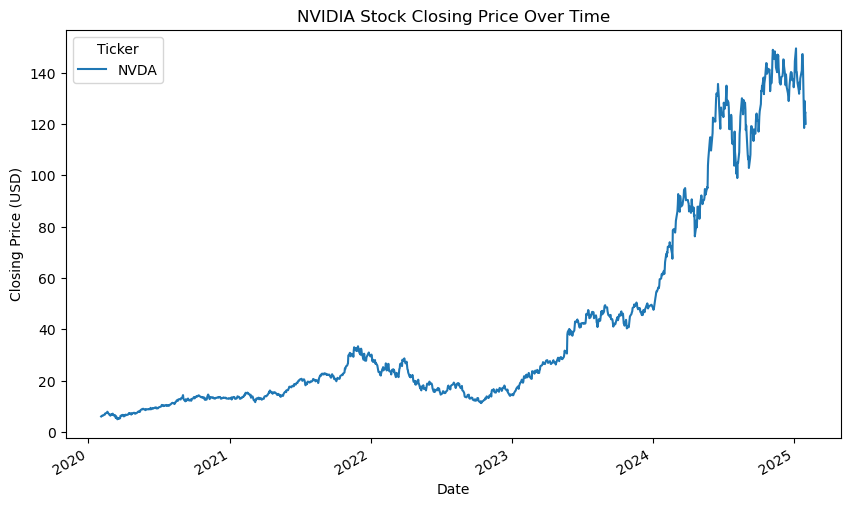

In [43]:
import yfinance as yf

# Download NVIDIA stock data (last 5 years)
nvidia_data = yf.download('NVDA', period='5y')

# Basic info about the stock data
print(nvidia_data.info())

# Summary statistics for NVIDIA stock
print(nvidia_data.describe())

# Check for missing values
print(nvidia_data.isnull().sum())

# Plot the closing price of NVIDIA stock
nvidia_data['Close'].plot(figsize=(10, 6))
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()


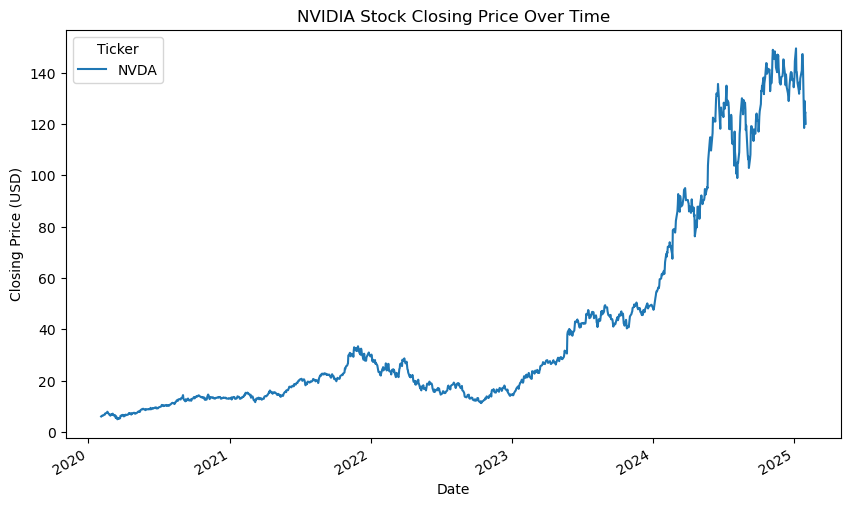

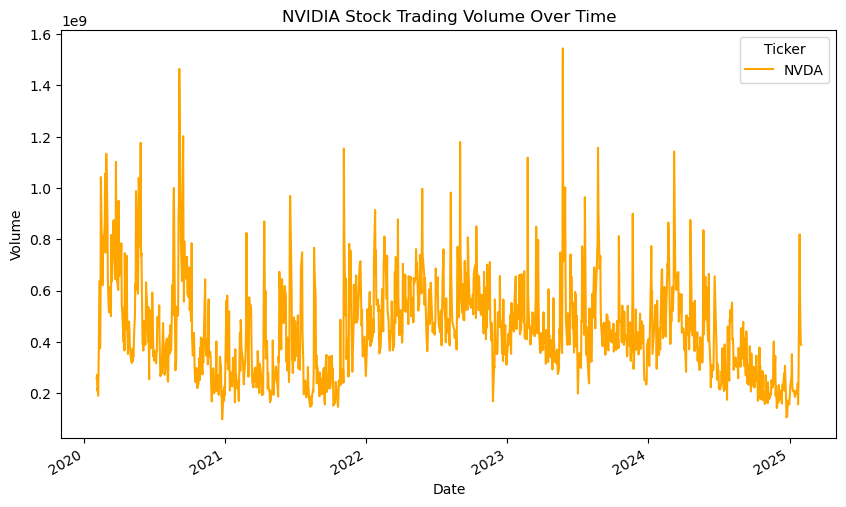

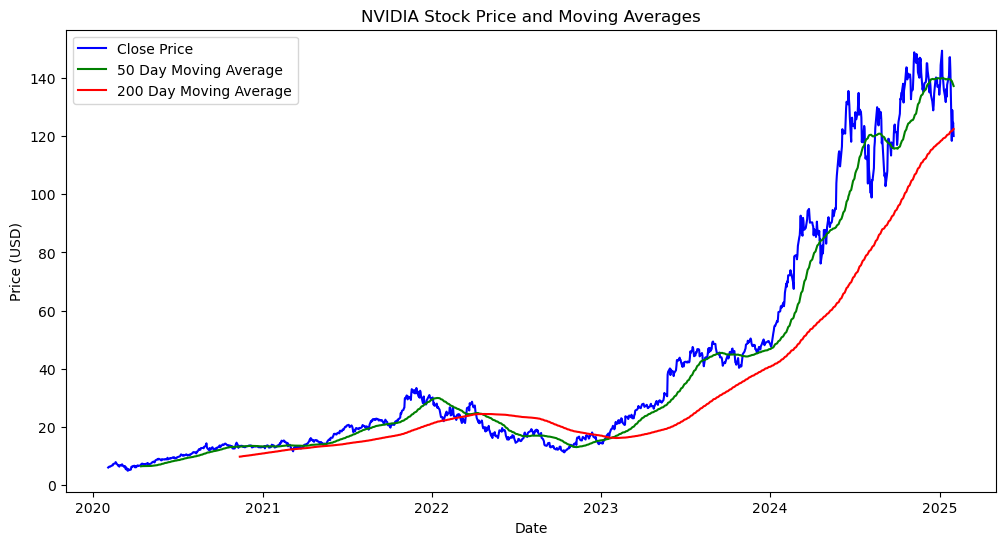

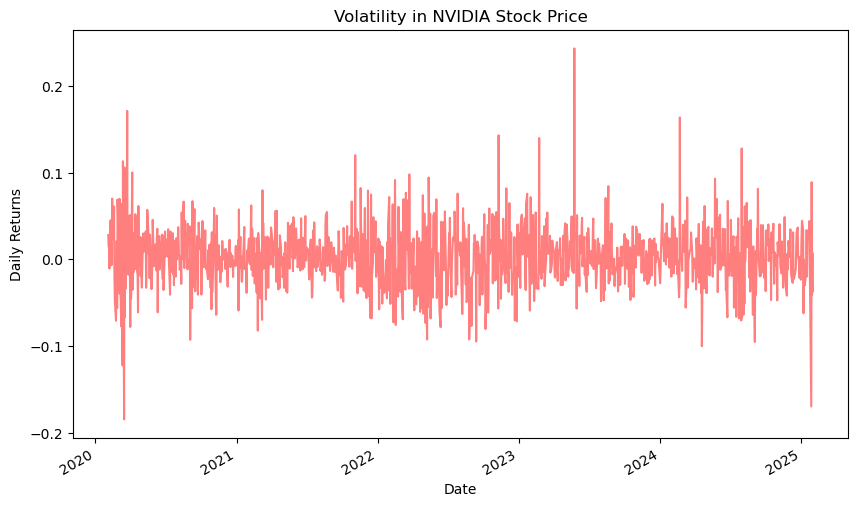

In [49]:
# EDA on NVIDIA stock data

# Plot the closing price of NVIDIA stock
nvidia_data['Close'].plot(figsize=(10, 6))
plt.title('NVIDIA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()

# Plot the trading volume of NVIDIA stock
nvidia_data['Volume'].plot(figsize=(10, 6), color='orange')
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Calculate the moving averages (50-day and 200-day)
nvidia_data['50_day_MA'] = nvidia_data['Close'].rolling(window=50).mean()
nvidia_data['200_day_MA'] = nvidia_data['Close'].rolling(window=200).mean()

# Plot the moving averages along with closing price
plt.figure(figsize=(12, 6))
plt.plot(nvidia_data['Close'], label='Close Price', color='blue')
plt.plot(nvidia_data['50_day_MA'], label='50 Day Moving Average', color='green')
plt.plot(nvidia_data['200_day_MA'], label='200 Day Moving Average', color='red')
plt.title('NVIDIA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Calculate daily returns
nvidia_data['Daily_Returns'] = nvidia_data['Close'].pct_change()

# Plot daily returns (volatility)
nvidia_data['Daily_Returns'].plot(figsize=(10, 6), color='red', alpha=0.5)
plt.title('Volatility in NVIDIA Stock Price')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

# Optional: Correlation with other assets (e.g., S&P 500)
# Example if you want to analyze S&P 500 correlation with NVIDIA
# sp500_data = yf.download('^GSPC', period='5y')
# nvidia_data['S&P500 Returns'] = sp500_data['Close'].pct_change()
# print(nvidia_data[['Daily_Returns', 'S&P500 Returns']].corr())
